In [93]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data=pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [97]:
#Dataframe Attributes
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [99]:
#Drop dupplicate column(Temp c) and unnamed column
data1=data.drop(['Unnamed: 0',"Temp C"],axis=1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [101]:
#Convert the month column data type to float data type
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [103]:
#Drop duplicated rows
data1.drop_duplicates(keep='first',inplace=True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [105]:
# Display data1 missing values count in each column using isnull().sum()
data1.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

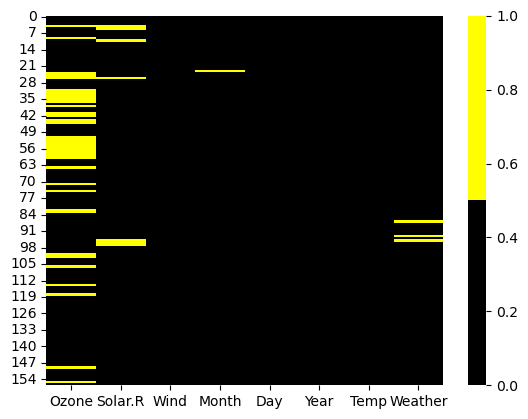

In [107]:
#visualize data1 missing values using heat map
cols=data1.columns
colors=['black','yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar=True)

In [109]:
#find the mean and median values of each numeric 
#imputation of missing value with median
median_Ozone=data1["Ozone"].median()
mean_Ozone=data1["Ozone"].mean()
print("median of Ozone: ",median_Ozone)
print("mean of Ozone: ",mean_Ozone)

median of Ozone:  31.0
mean of Ozone:  41.81512605042017


In [111]:
#replace the Ozone missing values with median value
data1['Ozone']=data1['Ozone'].fillna(median_Ozone)
data1.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [113]:
median_Ozone=data1["Ozone"].median()
mean_Ozone=data1["Ozone"].mean()
print("median of Ozone: ",median_Ozone)
print("mean of Ozone: ",mean_Ozone)

median of Ozone:  31.0
mean of Ozone:  39.197452229299365


In [115]:
print(data1["Weather"].value_counts())
mode_weather=data1["Weather"].mode()[0]
print(mode_weather)

Weather
S     58
C     49
PS    47
Name: count, dtype: int64
S


In [117]:
data1["Weather"]=data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

### Detection of outliers in the colpomns


#### Method1:Using histograms and box plots

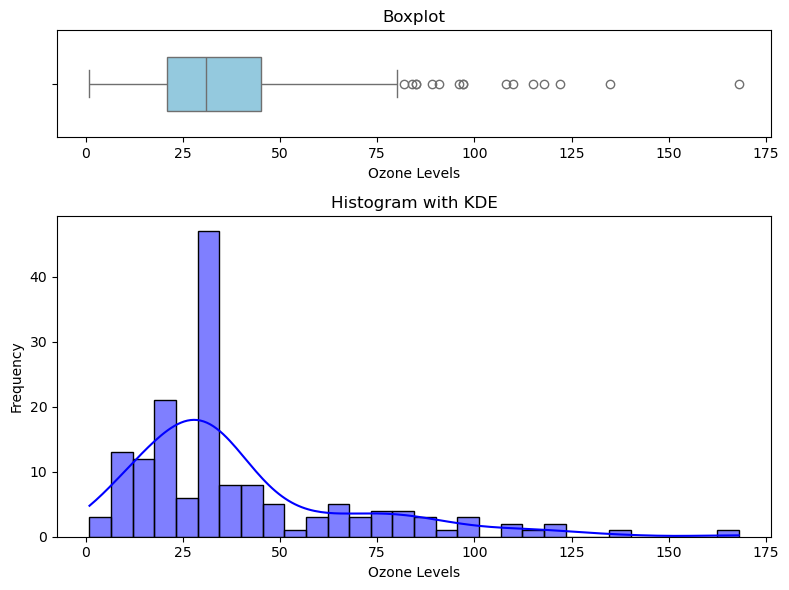

In [121]:
#create a figure with two subplots,stacked vertically
fig,axes=plt.subplots(2,1,figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1["Ozone"],ax=axes[0],color='skyblue',width=0.5,orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")

#plot the histogram with KDE curve in the second(bottom0subplot
sns.histplot(data1["Ozone"],kde=True,ax=axes[1],color='blue',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

#Adjust layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

# Observations

#### .The ozone column has exteme values beyond 81 as seen from box plot


#### .The same is confirmed from the below right-skewed histogram

<Axes: ylabel='Ozone'>

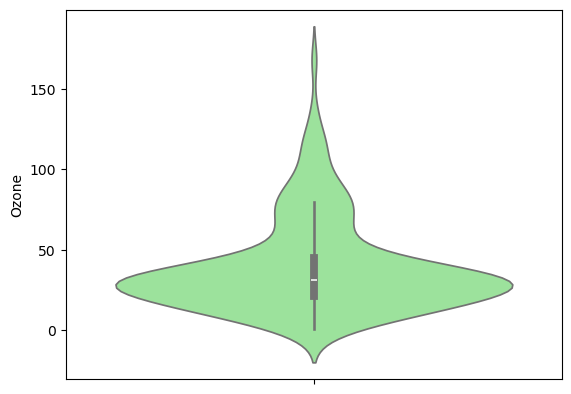

In [126]:
#create a figure for violin plot
sns.violinplot(data=data1["Ozone"],color='lightgreen')

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

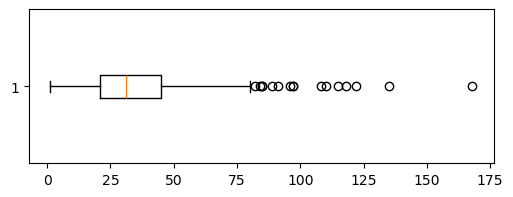

In [128]:
plt.figure(figsize=(6,2))
boxplot_data=plt.boxplot(data1["Ozone"],vert=False)
[item.get_xdata()for item in boxplot_data['fliers']]

#### Method 2
- *Using mu +/- 3*sigma limits(Standrad deviation method)

In [131]:
data1["Ozone"].describe()

count    157.000000
mean      39.197452
std       28.781992
min        1.000000
25%       21.000000
50%       31.000000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [133]:
mu=data1["Ozone"].describe()[1]
sigma=data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if((x< (mu - 3*sigma))or(x > (mu + 3 * sigma))):
        print(x)

135.0
168.0


/var/folders/tl/0x6rq40528zbdb7nj8tyjxq80000gn/T/ipykernel_27848/2242338873.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu=data1["Ozone"].describe()[1]
/var/folders/tl/0x6rq40528zbdb7nj8tyjxq80000gn/T/ipykernel_27848/2242338873.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma=data1["Ozone"].describe()[2]


## Observations 
- It is observed that only two outliers are identified using std method
- In box plot method more no of outliers are identified
- This is because the assumption of normality is not satisfied in this coloumn

## Quantlie-Quntaile plot for detection of ouliers

Text(0.5, 0, 'Theoretical Quantiles')

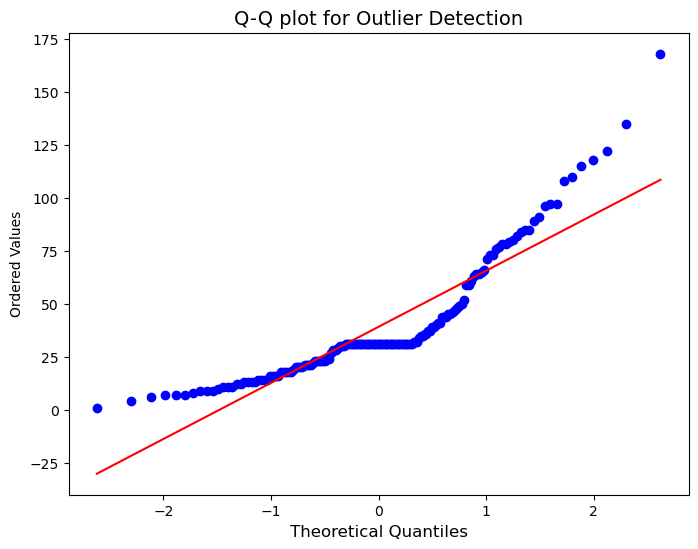

In [137]:
import scipy.stats as stats

#create Q-Q plot
plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"],dist="norm",plot=plt)
plt.title("Q-Q plot for Outlier Detection",fontsize=14)
plt.xlabel("Theoretical Quantiles",fontsize=12)

## Obseravations from Q-Q plot
- The data does not follow normal distribution as the data points are deviating significantly away from the red line
- The data shows a right-skewed distribution and possible outliers

#### Other visualisations tht could help in the detection of outliers

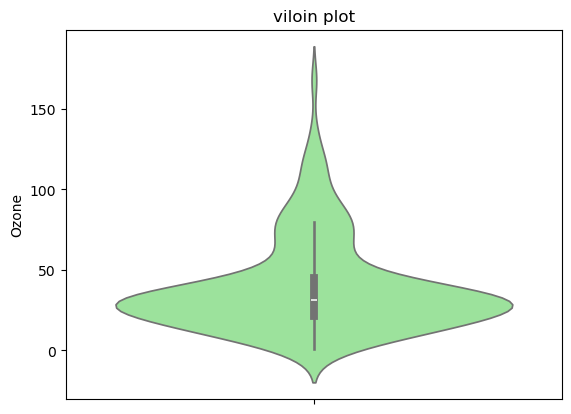

In [141]:
#create a figure for violin plot

sns.violinplot(data=data1["Ozone"],color='lightgreen')
plt.title("viloin plot")

#show the plot
plt.show()

/var/folders/tl/0x6rq40528zbdb7nj8tyjxq80000gn/T/ipykernel_27848/1590678044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

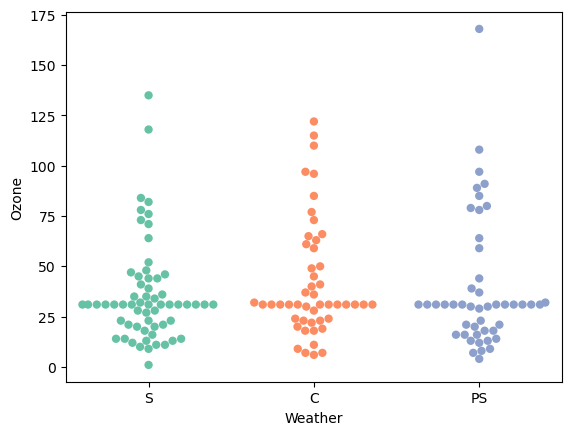

In [143]:
sns.swarmplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)

/var/folders/tl/0x6rq40528zbdb7nj8tyjxq80000gn/T/ipykernel_27848/1600510537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set1",size=6,jitter=True)


<Axes: xlabel='Weather', ylabel='Ozone'>

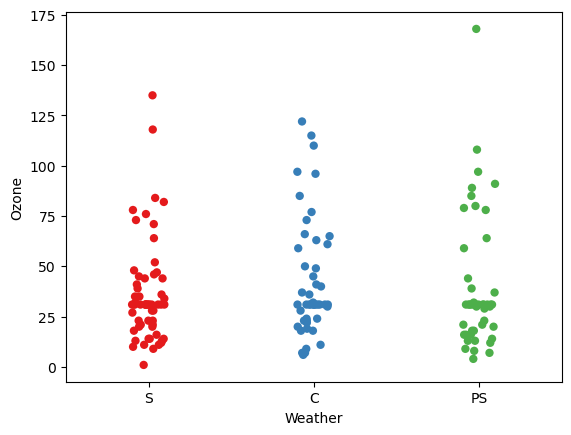

In [145]:
sns.stripplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set1",size=6,jitter=True)

<Axes: xlabel='Ozone', ylabel='Density'>

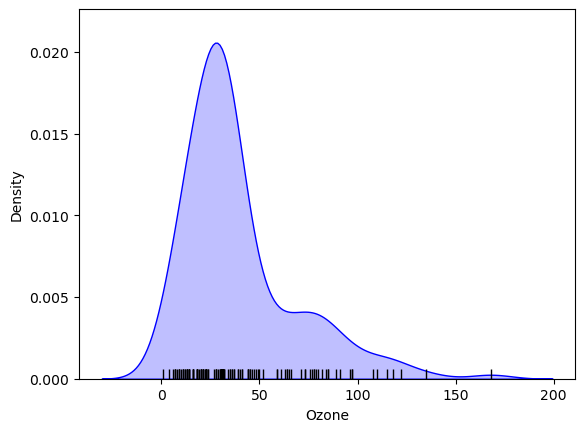

In [147]:
sns.kdeplot(data=data1["Ozone"],fill=True,color="blue")
sns.rugplot(data=data1["Ozone"],color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

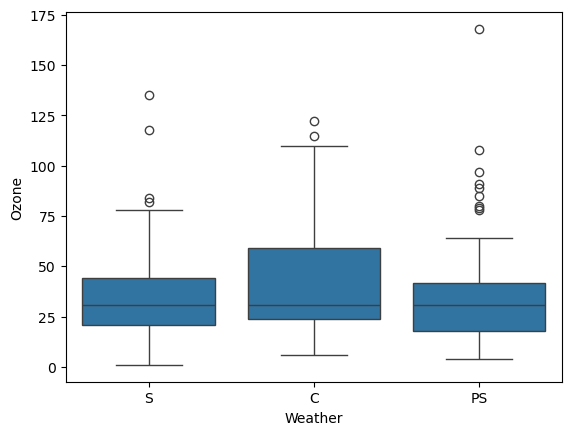

In [149]:
#category wise boxplot for ozone
sns.boxplot(data=data1,x="Weather",y="Ozone")

## Correlation coefficient and pair plots

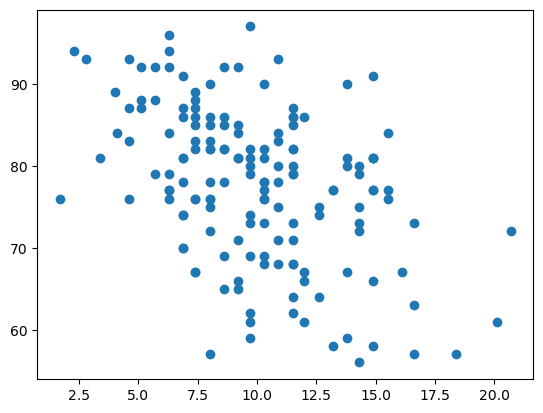

In [160]:
plt.scatter(data1["Wind"],data1["Temp"])

In [162]:
#compute pearson correlaton coefficient 
#between wind soeed and temperature
data1["Wind"].corr(data1["Temp"])

-0.44122806925588215

In [166]:
#Read all numeric columns into a new table
data1_numeric=data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,31.0,NaN,14.3,56
...,...,...,...,...
152,20.0,223.0,11.5,68
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,31.0,145.0,13.2,77
